# 회귀분석
***

## 회귀분석을 이용할 수 있는 경우
- 자료가 등간 척도나 비율 척도일 경우 활용이 가능하다.
- 독립변수 중 범주형 변수는 더미변수(가변수)를 사용한다.
- 종속변수가 이변량 변수이면 로지스틱 회귀분석을 실시한다.

## 선형회귀분석의 가정
- **선형성** : 독립변수와 종속변수의 관계가 선형이다.
- **등분산성** : 오차의 분산이 일정하다. 산점도를 그렸을 때 무작위로 분포되어 있어야 등분산성을 만족한다.
- **독립성** : 독립변수와 오차는 관련이 없다. 자기상관(독립성)을 알아보기 위해 Durbin-Watson 통계량을 사용하며 주로 시계열 데이터에서 많이 활용한다.
- **비상관성** : 오차들끼리 상관이 없다.
- **정규성** : 오차의 분포가 정규분포를 따른다. Q-Q Plot, Kolmogolov - Smirnovr검정, Shapiro-Wilk 검정 등을 활용한다.
***
## 회귀식 검토
#### - 결정계수를 통해 추정된 회귀식의 타당성을 검토한다.

#### - 독립변수가 많아지면 결정계수가 높아진다. -> 수정된 결정계수를 사용한다.
#### - 회귀식을 만들기 위해 다음의 가정을 고려해야 한다.
- **다중공선성** 여부 확인 : **VIF = $1 \over (1 - R^2)$**을 계산해야한다. **10이상인 경우 다중공선성** 문제를 의심해야한다.
- **잔차들 간의 상관성의 존재여부**를 판단해야 한다. 이때 사용되는 통계량은 **더빈왓슨계수**로 0 < D-W < 4의 값을 가지는데 만약 **1.5와 2.5 사이일 경우 자기상관이 없는 것**으로 판단한다.


***

## 회귀분석 종류
- 단순회귀분석 : 독립변수 하나
- 다중회귀분석 : 두 개 이상의 독립변수
- 다항회귀분석 : 독립변수와 종속변수와의 관계가 1차 함수 이상인 경우
- 비선형회귀분석 : 미지의 모수들의 선형관계로 이루어져 있지 않은 경우

### 단순회귀분석 분산분석표
| 요인 | 제곱합 | 자유도 | 제곱평균 | F |
| --- | --- | --- | --- | --- |
|회귀 | SSR | 1 | MSR = SSR | F = MSR / MSE |
| 잔차 | SSE | n - 2 | MSE = SSE / (n - 2) | 
|총 | SST | n - 1 | | |

### 다중회귀분석 분산분석표
| 요인 | 제곱합 | 자유도 | 제곱평균 | F |
| --- | --- | --- | --- | --- |
|회귀 | SSR | k | MSR = $SSR \over  k$ | F = MSR / MSE |
| 잔차 | SSE | n - k - 1 | MSE = SSE / (n -k - 1) | |
|총 | SST | n - 1 | | |

- k = 독립변수 개수
- n = 데이터 수

### 결정계수
- $SSR\over SST$ = 1 - $SSE\over SST$

In [2]:
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
cars = pd.read_csv('/Users/kisehyun/study_code/ADP/21th/csv/MASS/Cars93.csv')

In [5]:
cars.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


#### 단순회귀분석

In [6]:
model = ols('Price ~ Passengers', data = cars).fit()

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.3057
Date:                Thu, 03 Jun 2021   Prob (F-statistic):              0.582
Time:                        10:48:55   Log-Likelihood:                -342.22
No. Observations:                  93   AIC:                             688.4
Df Residuals:                      91   BIC:                             693.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.7738      5.050      3.322      0.001       6.743      26.804
Passengers     0.5379      0.973      0.553      0.582      -1.395       2.471
==============================================================================
Omnibus:                       37.893   Durbin-Watson:                   1.339
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.654
Skew:                           1.567   Prob(JB):                     5.05e-18
Kurtosis:                       6.276   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

모형의 결정계수는 0.003으로 매우 낮고 F-통계량은 0.3이며 이때 유의확률은 0.582로 모형이 통계적으로 유의하지 않다고 할 수 있다.

passengers 변수의 회귀계수는 0.5379이다.
***
#### 다중회귀분석

In [8]:
X = cars[['Price', 'EngineSize', 'RPM', 'Weight']]

In [9]:
model = ols('Price ~ EngineSize + RPM + Weight', data = X)
result = model.fit()

In [10]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     37.98
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           6.75e-16
Time:                        10:48:55   Log-Likelihood:                -304.05
No. Observations:                  93   AIC:                             616.1
Df Residuals:                      89   BIC:                             626.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -51.7933      9.106     -5.688      0.000     -69.887     -33.699
EngineSize     4.3054      1.325      3.249      0.002       1.673       6.938
RPM            0.0071      0.001      5.208      0.000       0.004       0.010
Weight         0.0073      0.002      3.372      0.001       0.003       0.012
==============================================================================
Omnibus:                       62.441   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.880
Skew:                           2.076   Prob(JB):                     2.62e-79
Kurtosis:                      11.726   Cond. No.                     8.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
model.exog_names

['Intercept', 'EngineSize', 'RPM', 'Weight']

모형식에서 독립변수는 '절편', 'EngineSize', 'RPM', 'Weight' 순이다.

In [15]:
model.exog.shape

(93, 4)

In [12]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,EngineSize,4.108869
1,RPM,1.437810
2,Weight,3.520026


VIF가 10을 초과하는 변수는 없는 것으로 나타났다.

***

**F-통계량**은 37.98이며 **유의확률**은 6.75e-16로 모형이 통계적으로 매우 유의하다고 할 수 있다. 

회귀계수들이 통계적으로 유의하며 결정계수가 낮아 데이터의 설명력은 낮지만 위의 3개의 변수로 자동차의 가격을 추정할 수 있다.

**더빈-왓슨** 통계량의 경우 1.406으로 2에 가깝기 때문에 오차항의 자기상관이 없음을 의미한다.

In [13]:
anova = anova_lm(result)
anova

,df,sum_sq,mean_sq,F,PR(>F)
EngineSize,1.0,3063.783973,3063.783973,72.431085,3.861891e-13
RPM,1.0,1274.763314,1274.763314,30.136750,3.760092e-07
Weight,1.0,480.836582,480.836582,11.367484,1.107490e-03
Residual,89.0,3764.637420,42.299297,NaN,NaN


In [ ]:
result.predict_conf_int(alpha = .05) # 95% 신뢰구간

### 회귀모형 진단

#### 1) Residual vs Fitted
- 선형 회귀에서 오차는  평균이 0이고 분산이 일정한 정규분포를 가정하므로 분산이 일정해야 한다.
- 따라서 기울기가 0인 직선이 관측되는 것이 이상적이다.

In [14]:
fitted = result.predict(X)
resid = result.resid

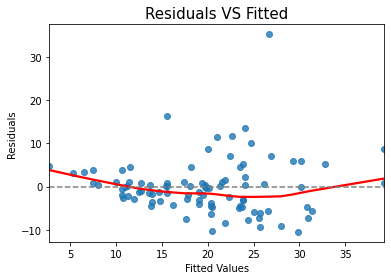

In [15]:
sns.regplot(fitted, resid, lowess = True, line_kws = {'color' : 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color = 'gray')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.title('Residuals VS Fitted', size = 15)
plt.show()

2차 함수 처럼 보이면 루트를 씌우면 된다.


#### 2) Normal Q-Q
- 잔차가 정규분포를 따른다.
- Q-Q Plot으로 확인 가능
- Shapiro-Wilk 검정 
- 잔차가 정규분포를 따르면 Q-Q Plot에서 점들이 점선을 따라 배치된다.

In [1]:
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import OLSInfluence
# OLSInfluence로 호출하는 방식과 result.get_influence()로 호출하는 방식 동일

In [17]:
sr = zscore(resid) # result.get_influence().resid_studentized_internal 과 동일 / 표준화 잔차
(x, y), _ = scipy.stats.probplot(sr)

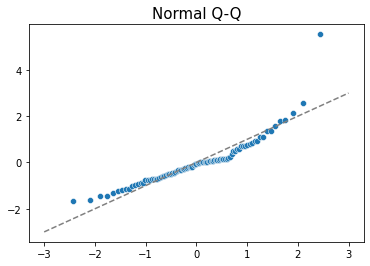

In [18]:
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')
plt.title('Normal Q-Q', size = 15)
plt.show()

In [19]:
from scipy.stats import probplot

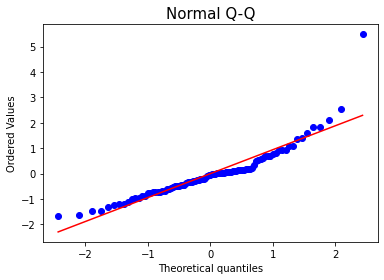

In [20]:
probplot(result.get_influence().resid_studentized_internal, plot = plt)
plt.title('Normal Q-Q', size = 15)
plt.show()

***
#### 3) Scale-Location
- 회귀모형을 통해 예측된 값이 모든 값들에 대해 잔차의 분산이 동일하다는 가정.
- 빨간색 실선이 수평을 그리는 것이 이상적

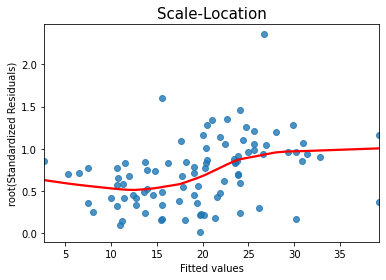

In [21]:
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess = True, line_kws = {'color': 'red'})
plt.title('Scale-Location', size = 15)
plt.ylabel('root(Standardized Residuals)')
plt.xlabel('Fitted values')
plt.show()

빨간선의 기울기가 0에 가까워야 하지만 Fitted Values가 커질수록 기울기가 변화하고 있다. 이처럼 빨간선의 기울기가 0에서 떨어진 점이 있다면 해당 점에서는 표준화 잔차가 큼을 의미하고 회귀직선이 y값을 잘 적합하지 못함을 의미한다. 또한 해당 점들은 이상치일 가능성이 있다.
***
#### 4) 극단값
- $Cook's Distance$
- 관측치별로 회귀모형에 미치는 영향을 나타낸다.
- 일반적으로 1이상일 경우 매우 큰 영향을 주는 관측값으로 간주한다.

In [22]:
cd, _ = OLSInfluence(result).cooks_distance

In [23]:
cd.sort_values(ascending=False).head()

58    0.181849
18    0.084765
56    0.072036
9     0.071539
47    0.067208
dtype: float64

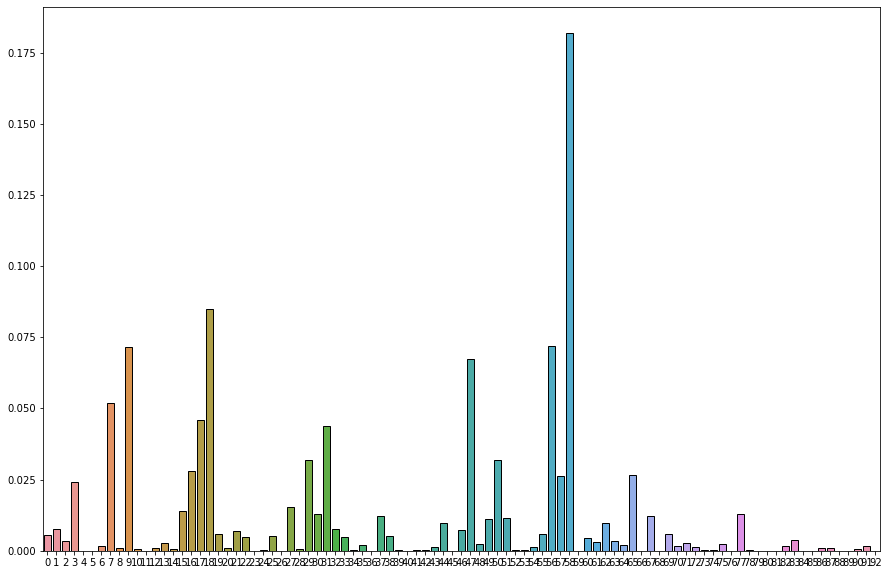

In [24]:
plt.figure(figsize = (15, 10))
sns.barplot(x = np.arange(cars.shape[0]), y = cd, edgecolor = (0, 0, 0))
plt.show()

#### 5) 영향력 진단
- x축은 leverage, y축은 표준화 잔차 값을 나타낸다. 
- $leverage$란 관측치가 다른 관측치 집단으로부터 떨어진 정도를 나타내며 극단에 치우친 정도를 의미한다.
- 쿡의 거리가 0.5 이상인 점은 예측치를  크게 벗어난 관측치이다.

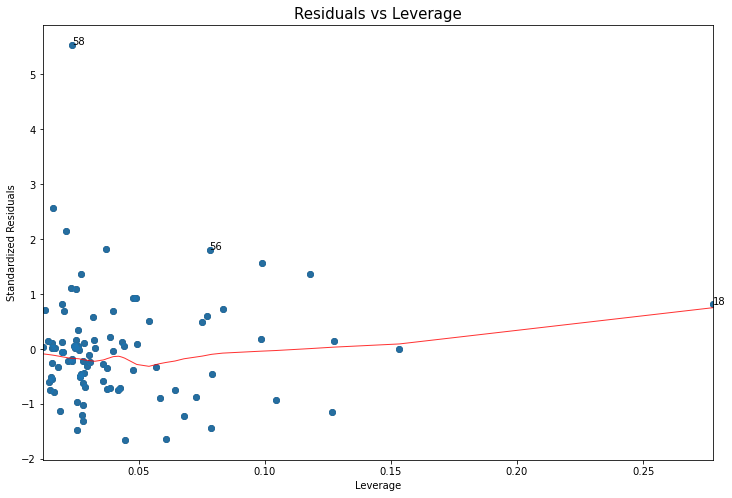

In [25]:
plt.figure(figsize = (10, 6))
plt.scatter(result.get_influence().hat_matrix_diag, sr, color = 'black', alpha = .7)
sns.regplot(result.get_influence().hat_matrix_diag, sr, lowess = True,
              line_kws = {'color': 'red', 'lw': 1, 'alpha': 0.8});
leverage_top_3 = np.flip(np.argsort(result.get_influence().cooks_distance[0]), 0)[:3]
for i in leverage_top_3:
    plt.annotate(i, xy = (result.get_influence().hat_matrix_diag[i], sr[i]));
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.title('Residuals vs Leverage', size = 15)
plt.show()

쿡의 거리가 0.5 이상이면 빨간 점선으로 표현되고 점선 바깥에 있는 점들은 무시할 수 없을 정도로 예측치를 벗어난 관측값이다. 쿡의 거리가 0.5이상인 관측치는 없기 때문에 회귀직선에 크게 영향을 끼치는 점들은 드물다고 볼 수 있다. 
***
#### 6) DFBETAS
- 특정 데이터를 제외한 회귀계수와 모든 데이터를 이용한 회귀계수의 차이
- 각 데이터(행별)로 표시됨
- 이상값 기준: 다른 행의 dfbeta 대비 얼마나 커야하는가? 
- 1보다 큰 경우 영향점이라고 판단한다.

In [26]:
pd.DataFrame(OLSInfluence(result).dfbetas, columns = [f'DFBETAS_{x}' for x in model.exog_names])

,DFBETAS_Intercept,DFBETAS_EngineSize,DFBETAS_RPM,DFBETAS_Weight
0,0.084661,-0.002883,-0.110004,-0.002854
1,-0.111813,-0.004748,0.082983,0.077745
2,-0.058539,-0.029882,0.039973,0.061679
3,-0.163005,-0.096870,0.104365,0.185433
4,0.004712,-0.001578,-0.004239,-0.001354
...,...,...,...,...
88,0.000020,-0.000129,-0.000077,0.000129
89,-0.003188,-0.003526,0.002931,0.003607
90,-0.013917,0.032055,0.029003,-0.027034
91,0.002655,-0.029602,-0.001125,0.020847


#### 3-7) DFFITS

- 특정 데이터를 제외한 모형의 적합값(fitted values)과 모든 데이터를 이용한 모형 적합값의 차이를 이용한다.
- 경험적으로 데이터가 적을 때는 값이 1보다 큰 경우를 영향점으로 판단한다.
- 반면 데이터가 많을 때는 값이 $2*\sqrt{변수의 수\over 표본의수}$ 보다 큰 경우 영향점으로 판단한다.

In [27]:
OLSInfluence(result).dffits

(0    -0.146570
 1     0.175099
 2     0.115128
 3     0.317692
 4    -0.006121
         ...   
 88    0.000150
 89    0.007842
 90    0.045132
 91    0.080813
 92    0.020264
 Length: 93, dtype: float64,
 0.4147806778921701)

데이터가 적으므로 절대값 1을 기준으로 한다.

In [28]:
abs(OLSInfluence(result).dffits[0]).sort_values()

88    0.000150
80    0.001604
85    0.003397
5     0.003455
66    0.003528
        ...   
47    0.521486
9     0.539905
56    0.544272
18    0.581903
58    1.042429
Length: 93, dtype: float64

58번 관측치를 영향치로 판단할 수 있다.
***
### 전 모형  탐색법(최적 부분집합 알고리즘)
- 변수만 p개 있는 경우 이를 이용하여 만들 수 있는 모든 모형의 개수는 일차항만 고려할 경우 $2^p$개가 된다. 전 모형 탐색법이란 $2^p$개의 모든 모형에 대해 점수를 구하고 가장 낮거나 높은 점수를 가지는 모형을 찾는 방법이다.
- 보통 변수의 개수인 p가 증가할수록 계산해야 되는 양은 엄청나게 많아지는데 보통 p가 30 이하일 때 사용한다.

#### 1) 수정된 결정계수

- 변수 개수 증가하면 자연히 결정계수도 증가
- 수정된 결정계수는 이러한 단점을 보완하고 변수 선택 가능.
- 수정된 결정계수 사용시 더 이상 변수를 추가할 필요가 없는 시점의 모형을 선택하게 된다.

In [71]:
from itertools import combinations

In [95]:
columns = ['Passengers', 'Horsepower', 'Length', 'Weight', 'Width', 'EngineSize']

In [104]:
ad_r_list = []
r_list = []
variables = []
cnt_variable = []
for n in range(1, len(columns)) :
    
    for c in combinations(columns, n) :
        exp = '+'.join(c)
        ols_exp = 'Price ~ ' + exp
        model = ols(ols_exp, data = cars)
        result = model.fit()
        r = result.rsquared
        r_list.append(r)
        ad_r = result.rsquared_adj
        ad_r_list.append(ad_r)
        variables.append(c)
        cnt_variable.append(len(c))

In [107]:
r_sq_df = pd.DataFrame({'num_of_variables' : cnt_variable, 'variable' : variables, 'ad_r' : ad_r_list, 'r' : r_list})
r_sq_df.sort_values(by = 'ad_r', ascending = False)[:10]

,num_of_variables,variable,ad_r,r
61,5,"(Horsepower, Length, Weight, Width, EngineSize)",0.682890,0.700125
51,4,"(Horsepower, Length, Weight, Width)",0.682677,0.696474
56,5,"(Passengers, Horsepower, Length, Weight, Width)",0.680963,0.698302
54,4,"(Horsepower, Weight, Width, EngineSize)",0.673899,0.688077
59,5,"(Passengers, Horsepower, Weight, Width, Engine...",0.672097,0.689918
34,3,"(Horsepower, Weight, Width)",0.670344,0.681094
44,4,"(Passengers, Horsepower, Weight, Width)",0.668590,0.682999
58,5,"(Passengers, Horsepower, Length, Width, Engine...",0.657553,0.676165
42,4,"(Passengers, Horsepower, Length, Width)",0.655560,0.670535
53,4,"(Horsepower, Length, Width, EngineSize)",0.655371,0.670355


#### 2) Mallow's CP

- 최소자승법을 사용하여 추정된 회귀모형의 적합성 평가에 사용
- Cp값이 작으며 p+상수(변수의 개수 + 상수)에 가까운 모형을 선택
1. Cp값이 p와 비슷한 경우 : 편향이 작고 우수한 모델
2. Cp값이 p보다 큰 경우 : 편향이 크고 추가적인 변수가 필요한 모델을 의미
3. Cp값이 p보다 작은 경우 : 분산의 증가폭보다 편향의 감소폭이 더 크며 필요 없는 변수가 모델에 있다는 것을 의미

In [111]:
cp_list = []
variables = []
cnt_variable = []
sst = np.sum(np.square((cars.Price - np.mean(cars.Price))))
for n in range(1, len(columns)) :
    
    for c in combinations(columns, n) :
        exp = '+'.join(c)
        ols_exp = 'Price ~ ' + exp
        model = ols(ols_exp, data = cars)
        result = model.fit()
        mse = result.mse_resid
        sse = np.sum(np.square(result.resid))
        cp = sse / mse - (cars.shape[0] - 2 * (len(model.exog_names) + 1))
        cp_list.append(cp)
        variables.append(c)
        cnt_variable.append(len(c))

In [114]:
cp_df = pd.DataFrame({'num_of_variables' : cnt_variable, 'variable' : variables, 'Cp' : cp_list})
cp_df.sort_values(by = 'Cp', ascending = False)[:10]

,num_of_variables,variable,Cp
61,5,"(Horsepower, Length, Weight, Width, EngineSize)",8.0
57,5,"(Passengers, Horsepower, Length, Weight, Engin...",8.0
60,5,"(Passengers, Length, Weight, Width, EngineSize)",8.0
59,5,"(Passengers, Horsepower, Weight, Width, Engine...",8.0
58,5,"(Passengers, Horsepower, Length, Width, Engine...",8.0
56,5,"(Passengers, Horsepower, Length, Weight, Width)",8.0
51,4,"(Horsepower, Length, Weight, Width)",7.0
48,4,"(Passengers, Length, Weight, EngineSize)",7.0
41,4,"(Passengers, Horsepower, Length, Weight)",7.0
42,4,"(Passengers, Horsepower, Length, Width)",7.0


CP값이 작으며 p+상수인 5에 가까우므로 적합한 모형이라고 할 수 있다.

변수선택시 for 문을 활용하면 적합한 모델 탐색을 할 수 있다.
***
#### 3) AIC(Akaike's information criterion) & BIC(Bayes information criterion)
- AIC = $n\log{SSE} - n\log{n} + 2p$
- BIC = $n\log{SSE} - n\log{n} + (n\log{n})p$

In [129]:
n = cars.shape[0]
aic_list = []
bic_list = []
variables = []
cnt_variable = []
sst = np.sum(np.square((cars.Price - np.mean(cars.Price))))
for n in range(1, len(columns)) :
    
    for c in combinations(columns, n) :
        exp = '+'.join(c)
        ols_exp = 'Price ~ ' + exp
        p = len(c) + 1 # 상수항 포함이므로 + 1
        model = ols(ols_exp, data = cars)
        result = model.fit()
        sse = np.sum(np.square(result.resid))
        aic = result.aic # n * np.log(sse) - n * np.log(n) + 2 * p
        bic = result.bic # n * np.log(sse) - n * np.log(n) + n * np.log(n) * p
        aic_list.append(aic)
        bic_list.append(bic)
        variables.append(c)
        cnt_variable.append(p)

In [130]:
ab_df = pd.DataFrame({'num_of_variables' : cnt_variable, 'variable' : variables, 'aic' : aic_list, 'bic' : bic_list})
ab_df.sort_values(by = 'aic')[:5]

,num_of_variables,variable,aic,bic
51,5,"(Horsepower, Length, Weight, Width)",583.870258,596.533255
61,6,"(Horsepower, Length, Weight, Width, EngineSize)",584.744854,599.940451
56,6,"(Passengers, Horsepower, Length, Weight, Width)",585.308295,600.503892
54,5,"(Horsepower, Weight, Width, EngineSize)",586.407998,599.070995
34,4,"(Horsepower, Weight, Width)",586.467178,596.597576


In [126]:
ab_df.sort_values(by = 'bic')[:5]

,num_of_variables,variable,aic,bic
51,4,"(Horsepower, Length, Weight, Width)",583.870258,596.533255
34,3,"(Horsepower, Weight, Width)",586.467178,596.597576
54,4,"(Horsepower, Weight, Width, EngineSize)",586.407998,599.070995
61,5,"(Horsepower, Length, Weight, Width, EngineSize)",584.744854,599.940451
56,5,"(Passengers, Horsepower, Length, Weight, Width)",585.308295,600.503892


#### 4) PRESS(Prediction Sum of Square)
- PRESS = $\sum_{i = 1}^N ({y_{i} - \hat y_{i_{(i)}})^2}$
- $\hat y_{i_{(i)}}$은 $i$번째를 제외한 데이터를 이용한 모형의 적합값이다. PRESS는 $i$번째 실제 $y$값과 추정값의 차이를 이용했다는 점에서 예측 오차를 나타내는 척도라 할 수 있다.
- 따라서 값이 작을수록 좋은 예측력을 가진 모형이라고 할 수 있다.
- PRESS를 계산하려면 $n - 1$ 개의 데이터를 이용하여 $n$번의 모형 적합을 해야 하지만 $Hat Matrix$를 사용하면 모든 데이터를 이용하여 적합한 모형 하나로 계산할 수 있다. 
- PRESS = $\sum_{i = 1}^n$ (${y_{i} - \hat y_{i}}\over 1 - h_{ii})$)$^2$
- $h_{ii}$는 $Hat Matrix$의 $i$번째 대각 원소이다.

In [158]:
### 수식으로 직접 구할 때 아래 코드 활용
# cars['Intercept'] = 1
# X = np.array(cars[['Intercept', 'Horsepower', 'EngineSize', 'Width', 'Length', 'Weight', 'Passengers']])
# X_tX = np.matmul(X.transpose(), X)
# X_tX_inv = np.linalg.inv(X_tX)
# hat_matrix = np.matmul(np.matmul(X, X_tX_inv), X.transpose())
# diag = np.array([hat_matrix[i][i] for i in range(cars.shape[0])])

In [175]:
n = cars.shape[0]
press_list = []
variables = []
cnt_variable = []
sst = np.sum(np.square((cars.Price - np.mean(cars.Price))))
for n in range(1, len(columns)) :
    
    for c in combinations(columns, n) :
        exp = '+'.join(c)
        ols_exp = 'Price ~ ' + exp
        p = len(c) + 1 # 상수항 포함이므로 + 1
        model = ols(ols_exp, data = cars)
        result = model.fit()
        press = OLSInfluence(result).ess_press
        # 다음과 동일press = np.sum(np.square(np.divide(result.resid, 1 - diag)))
        press_list.append(press)
        variables.append(c)
        cnt_variable.append(p)

In [178]:
press_df = pd.DataFrame({'num_of_variable' : cnt_variable, 'variable' : variables, 'press' : press_list})
press_df.sort_values(by = 'press')[:5]

,num_of_variable,variable,press
51,5,"(Horsepower, Length, Weight, Width)",2965.707105
61,6,"(Horsepower, Length, Weight, Width, EngineSize)",2980.426962
56,6,"(Passengers, Horsepower, Length, Weight, Width)",2986.667062
54,5,"(Horsepower, Weight, Width, EngineSize)",3060.455832
34,4,"(Horsepower, Weight, Width)",3062.701290


***
### 단계적 변수 선택법(각자 방식이 있어서 생략)


#### 1) 전진선택법(Forward Selection)
- 기존 모형에 가장 설명력이 좋은 변수를 하나씩 추가하는 방법

***
#### 2) 후진제거법

***
#### 3) 단계선택법

#### Box-cox 변환
- 정규분포를 따르지 않는 반응변수를 정규성을 만족하도록 변환시킨다.

In [34]:
from scipy.stats import boxcox

In [39]:
print(f'box-cox 변환 전 왜도는 {cars.Price.skew()}')

box-cox 변환 전 왜도는 1.53308185621344


In [40]:
print(f'box-cox 변환 후 왜도는 {pd.Series(boxcox(cars.Price)[0]).skew()}')

box-cox 변환 후 왜도는 0.020892143673899875
